<a href="https://colab.research.google.com/github/twyeh/highenergy/blob/main/Solutions_to_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flavio wcxf
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.8/594.8 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.3 MB/s eta 0:00:00
  Created wheel for wcxf: filename=wcxf-1.6.2-py3-none-any.whl size=218382 sha256=27816cec0df5791c945be5aa4860a345e43e63aba5c4f313b054d214a59a3b4e
  Stored in directory: /root/.cache/pip/wheels/77/4d/c7/6679e54977b42d38c94cb0dbaafde4992a9d20ad383a290cec
  Created wheel for parton: filename=parton-0.2.2-py3-none-any.whl size=14000 sha256=491bb843fc867a889748a5a9b36637632bc09f5e718d16f8828967c29f50b

In [2]:
import flavio
import flavio.plots as fpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## $P_5'$: LHCb vs. SM

Find all LHCb measurements of $P_5'$ (or do it manually by looking at measurements.yml)

In [3]:
meas = []
for mname, mobj in flavio.Measurement.instances.items():
    if mobj.experiment == 'LHCb':
        for obs in mobj.all_parameters:
            if isinstance(obs, tuple) and 'P5p' in obs[0]:
                meas.append(mname)
meas

['LHCb B->K*mumu 2020 P 0.1-0.98',
 'LHCb B->K*mumu 2020 P 1.1-2.5',
 'LHCb B->K*mumu 2020 P 2.5-4',
 'LHCb B->K*mumu 2020 P 4-6',
 'LHCb B->K*mumu 2020 P 6-8',
 'LHCb B->K*mumu 2020 P 11-12.5',
 'LHCb B->K*mumu 2020 P 15-17',
 'LHCb B->K*mumu 2020 P 17-19',
 'LHCb B->K*mumu 2020 P 1.1-6',
 'LHCb B->K*mumu 2020 P 15-19']

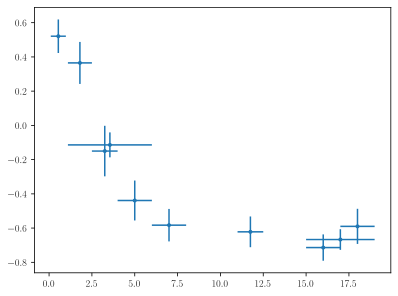

In [4]:
obs = '<P5p>(B0->K*mumu)';

_, bins = fpl.bin_plot_exp(obs, include_measurements=meas, col_dict={'LHCb': 'C0'});


In [5]:
bins

[(0.1, 0.98),
 (1.1, 2.5),
 (2.5, 4),
 (4, 6),
 (6, 8),
 (11, 12.5),
 (15, 17),
 (17, 19),
 (1.1, 6),
 (15, 19)]

Only some of those bins are reliable due to the presence of resonances

In [6]:
bins_th = [
 (0.1, 0.98),
 (1.1, 2.5),
 (2.5, 4),
 (4, 6),
 (15, 19)]

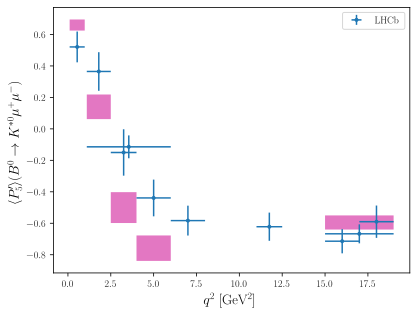

In [7]:
obs = '<P5p>(B0->K*mumu)';

_, bins = fpl.bin_plot_exp(obs, include_measurements=meas, col_dict={'LHCb': 'C0'});

fpl.bin_plot_th(obs, bins_th, threads=2)

plt.legend()
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable[obs].tex);

## $P_5'$: LHCb vs. NP

In [8]:
wc = flavio.WilsonCoefficients()
wc.set_initial({'C9_bsmumu': -1.2}, 4.8)

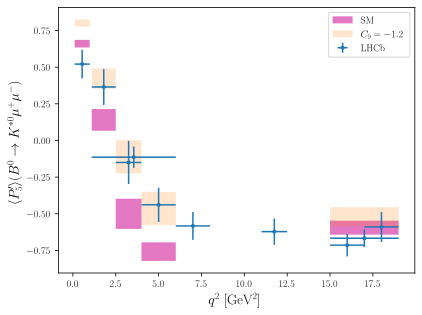

In [9]:
obs = '<P5p>(B0->K*mumu)';

_, bins = fpl.bin_plot_exp(obs, include_measurements=meas, col_dict={'LHCb': 'C0'});

fpl.bin_plot_th(obs, bins_th, threads=2, label='SM')
fpl.bin_plot_th(obs, bins_th, wc=wc, threads=2, fc='C1', alpha=0.2, label=r'$C_9=-1.2$')

plt.legend()
plt.xlabel(r'$q^2$ [GeV$^2$]')
plt.ylabel(flavio.Observable[obs].tex);

## Explaining flavour anomalies

In [10]:
def prediction_sm_np(wc_dict, scale, obs, *args, **kwargs):
    wc = flavio.WilsonCoefficients()
    wc.set_initial(wc_dict, scale)
    sm = flavio.sm_prediction(obs, *args, **kwargs)
    np = flavio.np_prediction(obs, wc, *args, **kwargs)
    return sm, np

In [11]:
prediction_sm_np({'C9_bsmumu': -1.2}, 4.8, '<Rmue>(B+->Kll)', q2min=1, q2max=6)

(1.0004026865424762, 0.7582075834097394)

In [12]:
prediction_sm_np({'C9_bsee': +1.2}, 4.8, '<Rmue>(B+->Kll)', q2min=1, q2max=6)

(1.0004026865424762, 0.7511421738206722)

In [13]:
prediction_sm_np({'C9_bsmumu': -1.2}, 4.8, '<Rmue>(B0->K*ll)', q2min=1.1, q2max=6)

(0.99645323173062, 0.8247149613898912)

In [14]:
prediction_sm_np({'C9_bsee': +1.2}, 4.8, '<Rmue>(B0->K*ll)', q2min=1.1, q2max=6)

(0.99645323173062, 0.7822304926888557)

In [15]:
prediction_sm_np({'CVL_bctaunutau': 0.21}, 4.8, 'Rtaul(B->Dlnu)')

(0.2949866465993772, 0.4308346452879053)

In [16]:
prediction_sm_np({'CVL_bctaunutau': 0.1}, 4.8, 'Rtaul(B->D*lnu)')

(0.2450585907131879, 0.2961412655317139)

A SMEFT scenario giving a pattern that could solve all anomalies:

In [20]:
!pip install wilson
import wilson
wc=wilson.Wilson({'lq3_3323': -1/2500**2, 'lq3_2223': +1/25000**2},160,'SMEFT', 'Warsaw')
wc.match_run(4.8,'WET', 'flavio')

EFT,Basis,scale
WET,flavio,4.8 GeV
,Re,Im
CVLL_bsbs,-9.499592e-17,1.779304e-18
CVLR_bsbs,7.011648e-22,-1.313341e-23
CVRR_bsbs,1.452638e-29,-2.721892e-31
CSLR_bsbs,-4.608709e-22,8.651287e-24
CVLL_bdbd,1.578422e-22,1.513264e-22
...,...,...
CVLR_numunueemu,2.682563e-23,4.336286e-31
CVLL_nutaunumumutau,-5.179606e-10,0.000000e+00
